In [44]:
%reload_ext autoreload
%autoreload 2

from agents import *
from Environments import RaceTrack, track_easy, track_hard, track_challenge, track_impossible
from IPython.display import Image

In [62]:
track = RaceTrack(track_challenge)

selector = EpsilonGreedy(eps=0.0)
learner = QLearning(alpha=0.5)
alpha_schedule = sigmoid_schedule(
    ["learner", "alpha"],
    learner.alpha,
    0.0,
)
epsilon_schedule = updown_schedule(
    ["selector", "eps"],
    selector.eps,
    0.1,
)

agent = Agent(
    num_states=track.num_states,
    num_actions=track.num_actions,
    selector=selector,
    learner=learner,
    schedules=[
        alpha_schedule,
        epsilon_schedule,
    ],
)

trainer = Trainer(agent=agent, env=track)

In [68]:
trainer.train(
    num_episodes=10_000,
    early_stop=-1,
)

Episodes:   1%|          | 99/10000 [00:00<?, ?it/s]

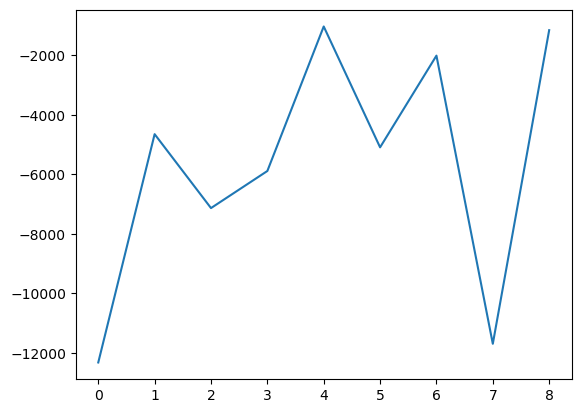

In [69]:
import matplotlib.pyplot as plt

plt.plot(agent.ep_returns[1:10])
plt.show()

Episode finished! Rendering animation...


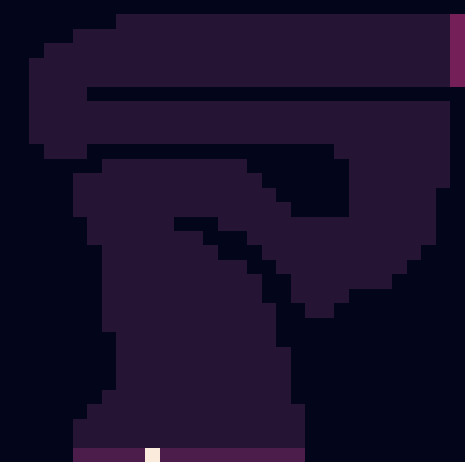

In [93]:
episode, _, _ = play_episode(agent, track, max_steps=100)
print("Episode finished! Rendering animation...")
ep_name = "testing"
filename = track.render_episode(episode, ep_name=ep_name)
Image(filename)